Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


C:\Users\soham\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


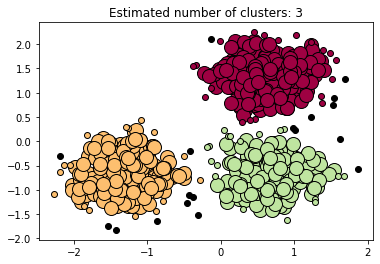

In [10]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
#eps- max distance between two points to consider them as neighbours
#min_samples- min number of neighbours of a point to consider them as core points, non-core points are considered as class member points or noise
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
# np.zeros_like :- Return an array of zeros with the same shape and type as a given array.
core_samples_mask[db.core_sample_indices_] = True
# so using np.zeros_like we created [0 0 ...0 0] whose len is equal to len(X)
# then in [0 0..0] we made only elements at those indices '1' where there are core samples in X.
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#The V-measure is the harmonic mean between homogeneity and completeness:
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
#adjusted_rand_score : doubt???
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
#The Mutual Information score expresses the extent to which observed frequency
#of co-occurrence differs from what we would expect (statistically speaking).
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        #-1 label is assigned to those points which are considered as noise
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    #print(class_member_mask)

    xy = X[class_member_mask & core_samples_mask]
    #core points:-when neighbours>=10 , class members when they just belong to the cluster but neighbours<10
    #print(xy[:, 0])
    #print(xy[:, 1])
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
    #core points are displayed with bigger marker size, and non-core points with smaller marker size

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

<font size='5'><b>For Dataset of Loan Amount and Applicant's income :-</b></font>

In [5]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/soham/Downloads/clustering.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


Automatically created module for IPython interactive environment
Estimated number of clusters: 6
Estimated number of noise points: 213
Silhouette Coefficient: -0.140


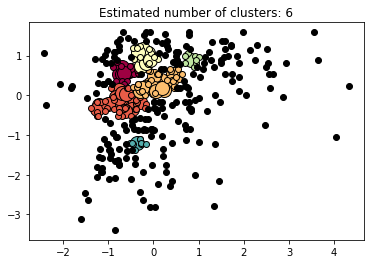

In [11]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X = df.loc[:,["ApplicantIncome","LoanAmount"]]

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
#eps- max distance between two points to consider them as neighbours
#min_samples- min number of neighbours of a point to consider them as core points, non-core points are considered as class member points or noise
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
# np.zeros_like :- Return an array of zeros with the same shape and type as a given array.
core_samples_mask[db.core_sample_indices_] = True
# so using np.zeros_like we created [0 0 ...0 0] whose len is equal to len(X)
# then in [0 0..0] we made only elements at those indices '1' where there are core samples in X.
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# #A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# #A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# #The V-measure is the harmonic mean between homogeneity and completeness:
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# #adjusted_rand_score : doubt???
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# #The Mutual Information score expresses the extent to which observed frequency
# #of co-occurrence differs from what we would expect (statistically speaking).
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        #-1 label is assigned to those points which are considered as noise
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    #print(class_member_mask)

    xy = X[class_member_mask & core_samples_mask]
    #core points:-when neighbours>=10 , class members when they just belong to the cluster but neighbours<10
    #print(xy[:, 0])
    #print(xy[:, 1])
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
    #core points are displayed with bigger marker size, and non-core points with smaller marker size

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()